In [1]:
from manim import *

Manim Community v0.16.0.post0

In [306]:
#Global variable with H coin and T coin used throughout
H = LabeledDot(Tex("H", color=BLACK), radius=0.35, color=BLUE).scale(1.5)
T = LabeledDot(Tex("T", color=BLACK), radius=0.35, color=YELLOW).scale(1.5)
empty_coin = LabeledDot(Tex("$T$", color=BLACK), radius=0.35, color=BLACK).scale(1.5)   


def set_target_location(A,B):
    A.target.set_x(B.get_x())
    A.target.set_y(B.get_y())

def animate_flip(coin,final='H',n_flips=2,side_H = None, side_T = None):
    #RETURNS a list of animations that animate the mobject "coin" being flipped
    #The "final" variable incidicates what you want it to be at the end of the flipping
    #To animate a coin, use a loop to play the animations:
    
    # for a in animate_flip(coins[i],coin_flips[i]):
    #            self.play(a,run_time=0.2)
    
    global H,T
    
    if side_H == None:
        side_H = H
    
    if side_T == None:
        side_T = T
    
    full_fc = [side_H.copy().move_to(coin.get_center()),side_T.copy().move_to(coin.get_center())]
    anim_list = []
    for i in range(2):
        coin.generate_target()
        coin.target.stretch(0.01,dim=1)
        #coin.target.color = BLACK
        anim_list.append(MoveToTarget(coin))

        coin.color = BLACK
        coin.generate_target()

        offset = 1 if final=='H' else 0 #Ensures the coin lands on the side requested
        coin.target = full_fc[ (i+offset) % 2]

        anim_list.append(MoveToTarget(coin))
    return anim_list*n_flips

# Teaser

In [ ]:
#Bunch of coins flipping accross the screen and title of the video written. 
#Idea: Letters on the coinflips accross the screen?
#Title:
# Betting on coin flips: Are two heads better than one?

In [347]:
%%manim -v CRITICAL teaser
class teaser(Scene):
    def construct(self):
        
                
        nflip = 3
        colr = [BLUE, YELLOW]
        
        def create_coins(n):
            coins = VGroup()
            for i in range(n):    
                my_H = LabeledDot(Tex('H', color=BLACK), radius=0.35, color=BLUE).scale(1.5)
                coins += my_H
            coins.arrange(RIGHT)
            return coins
        
        def create_coins_anim(coins_H,coins_T,coins):             
            coins_anim = [None for i in range(len(coins))]
            for i in range(len(coins)):
                my_H = LabeledDot(Tex(coins_H[i], color=BLACK), radius=0.35, color=colr[ i % 2]).scale(1.5)
                my_T = LabeledDot(Tex(coins_T[i], color=BLACK), radius=0.35, color=colr[ (i+1) % 2]).scale(1.5)
                coins_anim[i] = animate_flip(coins[i],final='T',n_flips=nflip,side_H = my_H, side_T = my_T)
            return coins_anim
        
        coins1 = create_coins(4)
        
        coins2 = create_coins(4)
        vg = VGroup(coins1,coins2).arrange(RIGHT)
        vg.shift(2*UP)
        coins1.shift(0.5*LEFT)
        coins2.shift(0.5*RIGHT)
        
        coins1_anim = create_coins_anim('COIN','PROB',coins1) 
        for i in range(2*nflip):
            anim_list = [ my_anim[i] for my_anim in coins1_anim ]
            self.play(*anim_list, run_time = 0.1)
        
        
        coins2_anim = create_coins_anim('FLIP','BLTY',coins2)
        for i in range(2*nflip):
            anim_list = [ my_anim[i] for my_anim in coins2_anim ]
            self.play(*anim_list, run_time = 0.1)
        
        
        coins3 = create_coins(6)
        coins3.next_to(coins1,DOWN)
        coins3.set_x(0)
        coins3_anim = create_coins_anim('CASINO','MAGIC!',coins3)
        for i in range(2*nflip):
            anim_list = [ my_anim[i] for my_anim in coins3_anim ]
            self.play(*anim_list, run_time = 0.1)
        
        
        
        
        text = Tex("Are two heads better than one?").scale(1.5)
        #text.next_to(coins2,2*DOWN)
        text.set_x(0)
        text.set_y(0)
        text.shift(DOWN)
        self.play(Write(text))
        

# Example Flips

In [348]:
%%manim -v CRITICAL game_rules
class game_rules(Scene):
    def construct(self):
        
        pause_len = 2
        
        
        
        
        global H,T,empty_coin
        
        
        question = Tex("\emph{Q}: Which target sequence should you choose?").scale(1.25)
        question.to_corner(UL)
        #self.play(Write(question))
        
        title = Tex("Game Rules").scale(1.25)
        title.to_corner(UL)
        title.set_x(0)
        
        
        text1a = Tex(r"$\bullet$ You choose a \emph{target sequence} of 2 coins")
        text1b = Tex(r" e.g. ")
        step1 = VGroup(text1a,text1b,H.copy().scale(0.75),H.copy().scale(0.75))
        step1.arrange(RIGHT)
        step1.next_to(question,DOWN)
        step1.align_to(question,LEFT)
        
        
        
        step2 = Tex(r"$\bullet$ We flip coins until target appears")
        step2.to_corner(UL)
        step2.next_to(text1a,DOWN)
        step2.align_to(text1a,LEFT)
        
        
        coin_flips = 'THTHH'
        coins = VGroup(*[H.copy() if c=='H' else T.copy() for c in coin_flips])
        coins.arrange(RIGHT)
        coins.next_to(step2,4*DOWN) #shift(UP*0.5)
        coins.set_x(0)
        
        coin_flip_animations = [None for i in range(len(coin_flips))]
        for i in range(len(coin_flips)):
            coin_flip_animations[i] = animate_flip(coins[i],coin_flips[i])
        
        
        eg = Tex("e.g. ")
        eg.next_to(coins,LEFT)
        
        
        
        #Animations
        
        #Initial coin flipping sequence
        for i in range(len(coin_flips)):
            for a in coin_flip_animations[i]:
                self.play(a,run_time=0.1)
        
        self.play(FadeOut(coins))
        
        #Rules for target sequence game
        self.play(Write(title))
        
        #Step 1 
        self.play(Write(text1a))
        self.wait(pause_len)
        step1 -= text1a
        self.play(Write(step1))
        self.wait(pause_len)
        
        #Step 2
        self.play(Write(step2))
        self.wait(pause_len)
        
        #Example Coin flips
        
        self.play(Write(eg))
        for i in range(len(coin_flips)):
            for a in coin_flip_animations[i]:
                self.play(a,run_time=0.1)
        
        
        box = SurroundingRectangle( VGroup(coins[-2],coins[-1]), color=WHITE, buff=SMALL_BUFF)
        self.play(Write(box))
        self.wait(pause_len)
        
        
        #text3 = Tex(r"Define $N_{HH} := $ Number of coinflips until target reached",color=WHITE)
        #text3.next_to(coins,3*DOWN)
        #self.play(Write(text3))
        #self.wait(pause_len)
        
        step3 = VGroup( Tex(r"$\bullet$ You pay "),Tex(r"$\$1$",color=RED),Tex(" for each coin flipped") )
        step3.arrange(RIGHT)
        step3.next_to(coins,4*DOWN)
        step3.align_to(step2,LEFT)
        self.play(Write(step3))
        self.wait(pause_len)
        
        step4 = VGroup( Tex(r"$\bullet$ You win "),Tex(r"$\$5$",color=GREEN), Tex(" once target is reached"))
        step4.arrange(RIGHT)
        step4.next_to(step3,DOWN)
        step4.align_to(step3,LEFT)
        self.play(Write(step4))
        self.wait(pause_len)
        
        N_HH = Tex(r"$N_{HH}=5$",color=WHITE)
        N_HH.next_to(box,UP)
        self.play(Write(N_HH))
        self.wait(pause_len)
        
        
        question.set_x(0)
        title.generate_target()
        title.target = question
        self.play(MoveToTarget(title))#Write(question))
        self.wait(pause_len)
        
        
        
        
        
        #outcome_text = Tex("Your net winnings: ")
        #p5 = Tex(r"$+\$5 $", color=GREEN)
        #m5 = Tex(r"$-\$ N$", color=RED) #Tex(r"$-\$5 $", color=RED)
        #e0 = Tex(r"$ = \$0 $", color=WHITE)
        #outcome = VGroup(outcome_text,p5,m5,e0)
        #outcome.arrange(RIGHT)
        #outcome.next_to(step3,DOWN)
        #outcome.set_x(0)
        #self.play(Write(outcome))
        
        
        
        
        

Voiceover:

Welcome to the coinflip casino where the only thing we bet on are sequences of fair coin flips. Here are the rules to one of our most popular casino games.

You start by choosing a target sequence of 2 coin flips. For example, you could choose the sequence "Heads Heads".

We then start flipping coins and only stop once we reach the target. For example, the coins might come out Tails, Heads, Tails, Heads, Heads, at which point we have reached the target and we stop.

You have to pay $1 for each coin that was flipped, but you win $5 once the target is reached. In this example, there were N equals 5 flips until Heads-Head was reached, so by serindipty you break even on the bet. In general, you win money if your target sequence appears in less than 5 coin flips, and you lose money when it takes more than 5. 

The question in this video is which target sequence should you chose? Of the 4 possible sequences, HH, HT, TH or TT can you pick the best one? Or can you convinve yourself that it doesn't matter which sequence is chosen? Pause and ponder which sequence you would choose if offered this bet. Write in the comments which target sequence you think is best.

# Answer

In [341]:
%%manim -v CRITICAL answer
class answer(Scene):
    def construct(self):
        pause_len = 1
        global H,T,empty_coin
        
        pause_len = 2
        coin_scale = 1
        txt_scale = 1.2
        q_scale = 1
        
        eqn_scale = 1.2
        
        
        #Setup defn and equation...which will be revealed later!
        defn = Tex(r"$\mathbb{E}[N_{\text{target}}]$ := \text{Average number of coinflips until target}")
        defn.to_corner(UL)
        defn.set_x(0)
        
    
        
        #VGroup(Tex("takes \emph{longer} than"),Tex("(on average)")).arrange(DOWN)
        HH = VGroup(H.copy(),H.copy()).scale(coin_scale).arrange(RIGHT)
        HT = VGroup(H.copy(),T.copy()).scale(coin_scale).arrange(RIGHT)
        
        Q1 = VGroup(Tex("\emph{Q}:"), HH.copy(),Tex(" vs. ").scale(1.2), HT.copy(), Tex("?")).scale(q_scale).arrange(RIGHT)
        Q1.next_to(defn,2*DOWN)
        Q1.set_x(0)
        
        self.play(Write(Q1))
        self.wait(pause_len)
        
        
        boxHH = SurroundingRectangle(Q1[1],color=RED, buff=SMALL_BUFF)
        HH_text = VGroup(Tex("Takes 6 flips",substrings_to_isolate="6"),Tex("on average")).scale(eqn_scale).arrange(DOWN)
        HH_text[0].set_color_by_tex("6",RED)
        HH_text.next_to(boxHH,DOWN)
        
        
        boxHT = SurroundingRectangle(Q1[3],color=GREEN, buff=SMALL_BUFF)
        HT_text = VGroup(Tex("Takes 4 flips",substrings_to_isolate="4"),Tex("on average")).scale(eqn_scale).arrange(DOWN)
        HT_text[0].set_color_by_tex("4",GREEN)
        HT_text.next_to(boxHT,DOWN)
        
        Q1[0].target = Tex("\emph{A}:")
        set_target_location(Q1[0],Q1[0])
        #Q1[2].target = Tex("$>$").scale(1.2)
        #set_target_location(Q1[2],Q1[2])
        Q1[4].target = Tex("!")
        set_target_location(Q1[4],Q1[4])
        
        #MoveToTarget(Q1[2])
        self.play(MoveToTarget(Q1[0]),MoveToTarget(Q1[4]),Write(boxHH),Write(boxHT))
        self.wait(pause_len)
        self.play(Write(HH_text),Write(HT_text))
        self.wait(pause_len)
        
        
    
        self.play(Write(defn))
        self.wait(pause_len)
        
        
        new_HH_text = Tex(r"$\mathbb{E}[N_{HH}]$", "$=$", "6",substrings_to_isolate="6").scale(eqn_scale)
        new_HH_text.set_color_by_tex("6",RED)
        new_HH_text.next_to(boxHH,DOWN)
        
        new_HT_text = Tex(r"$\mathbb{E}[N_{HT}]$", "$=$", "4",substrings_to_isolate="4").scale(eqn_scale)
        new_HT_text.set_color_by_tex("4",GREEN)
        new_HT_text.next_to(boxHT,DOWN)
    
        
        
        self.play(TransformMatchingTex(HH_text[0],new_HH_text),FadeOut(HH_text[1]),TransformMatchingTex(HT_text[0],new_HT_text),FadeOut(HT_text[1]))
        HT_text = new_HT_text
        HH_text = new_HH_text
        self.wait(pause_len)
 
        
        TT_text = Tex(r"$\mathbb{E}[N_{TT}]$", "$=$", "6",substrings_to_isolate="6").scale(eqn_scale)
        TT_text.set_color_by_tex("6",RED)
        
        TH_text = Tex(r"$\mathbb{E}[N_{TH}]$", "$=$", "4",substrings_to_isolate="4").scale(eqn_scale)
        TH_text.set_color_by_tex("4",GREEN)
        
        TH_text.next_to(HT_text,DOWN)
        TT_text.next_to(HH_text,DOWN)
        TT_text.align_to(HH_text,RIGHT)
        self.play(Write(TH_text),Write(TT_text))
        self.wait(pause_len)
        
        HHTT = VGroup(H.copy(),H.copy(),T.copy(),T.copy()).scale(coin_scale).arrange(RIGHT)
        HTHT = VGroup(H.copy(),T.copy(),H.copy(),T.copy()).scale(coin_scale).arrange(RIGHT)
        
        Q2 = VGroup(Tex("\emph{Q}:"), HHTT.copy(),Tex(" vs. ").scale(1.2), HTHT.copy(), Tex("?")).scale(q_scale).arrange(RIGHT)
        Q2.next_to(TH_text,2*DOWN)
        Q2.set_x(0)
        
        self.play(Write(Q2))
        self.wait(pause_len)
        
        boxHHTT = SurroundingRectangle(Q2[1],color=GREEN, buff=SMALL_BUFF)
        HHTT_text = Tex(r"$\mathbb{E}[N_{HHTT}]$", "$=$", "16",substrings_to_isolate="16").scale(eqn_scale)
        HHTT_text.set_color_by_tex("1",GREEN)
        HHTT_text.set_color_by_tex("6",GREEN)
        HHTT_text.next_to(boxHHTT,DOWN)
        
        boxHTHT = SurroundingRectangle(Q2[3],color=RED, buff=SMALL_BUFF)
        HTHT_text = Tex(r"$\mathbb{E}[N_{HTHT}]$", "$=$", "20",substrings_to_isolate="20").scale(eqn_scale)
        HTHT_text.set_color_by_tex("2",RED)
        HTHT_text.set_color_by_tex("0",RED)
        HTHT_text.next_to(boxHTHT,DOWN)
        
        Q2[0].target = Tex("\emph{A}:")
        set_target_location(Q2[0],Q2[0])
        #Q2[2].target = Tex("$<$").scale(1.2)
        #set_target_location(Q2[2],Q2[2])   
        Q2[4].target = Tex("!")
        set_target_location(Q2[4],Q2[4])
        #,MoveToTarget(Q2[2])
        self.play(MoveToTarget(Q2[0]),MoveToTarget(Q2[4]),Write(boxHHTT),Write(boxHTHT))
        self.wait(pause_len)
        self.play(Write(HHTT_text),Write(HTHT_text))
        self.wait(pause_len)
        
        
        
        
        
        
        

To be concerte, lets look specifically at the target sequence HH vs HT. WHich one is better? Are they the same? Suprisingly, they are not the same! HH is a losing target sequence and loses money in the long run. HT on the other hand is a winning target sequence! 

This is because HH takes 6 flips on averasge to appear, while HT takes only 4 flips on average.

If we use the notation, E for expected or average value, and  N subscript target to denote the average number of flips needed, we can write this mathematically as the expected value of N_heads heads is 6 and the expected value of N_heads tails is 4. 

By symmetry, the expected value of N tails tails is 6 and the expected value of N heads tails is 4. The suprising thing perhaps is that this symetty does not work btween heads-heads and heads-tails!

In fact for longer sequences, things continue to be very counterinituitive. Consider playing the game with target sequences of length 4. Lets compare the strings HHTT and HTHT. If HH takes longer than HT, and TT also takes longer than HT, than surely HHTT takes longer than HTHT right?!?! Surprisingly, no! Here, the sequence HTHT is the one that takes longer on average and HHTT is the faster one. It turns out that HTHT takes 20 flips on average, while HHTT takes only 16. This is completly the opposite of what you would intuitively think by looking at the HH vs HT comparison. 

What is going on here? What is the pattern? By the end of the video we'll develop a simple one line method that allows you to calculate any of these expected values and will explain the pattern.

The completly counterintuitive answer is that some sequences are better than others! Heads-Heads is a losing target-sequence! It takes on average 6 coinflips to reach HH, which means you are losing a dollar each time you play the game on average. We indicate this fact here with an "E" for "expected value" or "average value", and use the notation N_HH to mean the "number of coinflips until HH is reached".  

On the other hand, the target sequence Heads-Tails is winning! It only takes 4 coinflips on average to reach this, so you gain a dollar on average each time you play. 


By the symmetry of swapping the label Heads with the label Tails on the coin, the target sequences TT and TH are the same as HH and HT respectively. The surprsing counterintuitive fact is that a target sequence with two of the same coin is genuinly differnt than one with two different coins. In the rest of the video, I'll give an intuitive explanation of why HH takes longer than HT on average and also show a really slick way to calcualt these numbers 4 and 6.

We can ask the same question in general for any target seuqence of any length. For example, an interesting qustion is for lenght four sequences, which takes longer: HHTT or HTHT? You might think that since HH and TT both take longer than HT, that a


# Intuition

In [639]:
%%manim -v CRITICAL intuition
class intuition(Scene):
    def construct(self):    
        
        c_scale = 0.75
        title = VGroup(Tex("Partial progress for "),H.copy().scale(c_scale),T.copy().scale(c_scale),Tex( "vs."),H.copy().scale(c_scale),H.copy().scale(c_scale)).arrange(RIGHT)
        title.to_corner(UR)
        title.set_x(0)
        self.add(title)
        
        pause_len = 2
        h_seperation = 4.5
        v_seperation = 1
        state = [[None for i in range(3)] for j in range(2)]
        
        state[0][0] = VGroup( Tex(r"0 out of 2"),  VGroup(Tex("..."),T.copy().scale(0.5)).arrange(RIGHT) ).arrange(DOWN)
        state[0][1] = VGroup( Tex(r"1 out of 2"),  VGroup(Tex("..."),H.copy().scale(0.5)).arrange(RIGHT) ).arrange(DOWN)
        state[0][2] = VGroup( Tex(r"2 out of 2"),  VGroup(Tex("..."),H.copy().scale(0.5),T.copy().scale(0.5)).arrange(RIGHT) ).arrange(DOWN)
        state[0][0].shift(h_seperation*LEFT)
        state[0][2].shift(h_seperation*RIGHT)
        
        state[1][0] = state[0][0].copy() #VGroup( Tex(r"0 out of 2"),  H.copy().set_color(BLACK).scale(0.5)).arrange(DOWN)
        state[1][1] = state[0][1].copy() #VGroup( Tex(r"1 out of 2"),  H.copy().scale(0.5) ).arrange(DOWN)
        state[1][2] = VGroup( Tex(r"2 out of 2"),  VGroup(Tex("..."),H.copy().scale(0.5),H.copy().scale(0.5)).arrange(RIGHT) ).arrange(DOWN)
        state[1][2].shift(h_seperation*RIGHT)
        
        box = [[None for i in range(3)] for j in range(2)]
        
        
        for j in range(2):
            for i in range(3):
                box[j][i] = SurroundingRectangle(state[j][i], buff=0.25, corner_radius=0.1, color=WHITE) 
                state[j][i] += box[j][i]
        
        v_off = 0.5
        for i in range(3):
            state[0][i].shift(v_seperation*UP)
            state[1][i].shift(v_seperation*DOWN)
            state[0][i].shift(v_off*DOWN)
            state[1][i].shift(v_off*DOWN)
            

            
            
        
        arrow = [[None for i in range(4)] for j in range(2)]
        
        
        dirs = [UP,DOWN]
        sign = [1,-1]
        for j in range(2):
            arrow[j][0] = Arrow(state[j][0].get_edge_center(RIGHT), state[j][1].get_edge_center(LEFT),buff=0.05,color=GREEN)
            arrow[j][1] = Arrow(state[j][1].get_edge_center(RIGHT), state[j][2].get_edge_center(LEFT),buff=0.05,color=GREEN)
            arrow[j][2] = ArcBetweenPoints(state[j][0].get_edge_center(dirs[j]), state[j][0].get_edge_center(LEFT),angle=sign[j]*3.5, color=RED ).add_tip()
        
            if j==0:
                arrow[j][3] = ArcBetweenPoints(state[j][1].get_edge_center(dirs[j]), state[j][1].get_edge_center(LEFT),angle=3.5, color=RED ).add_tip()
            elif j==1:
                arrow[j][3] = ArcBetweenPoints(state[j][1].get_edge_center(dirs[j]), state[j][0].get_edge_center(DOWN),angle=-1, color=RED ).add_tip()
        
        label = [[None for i in range(4)] for j in range(2)]
        for j in range(2):
            for i in range(4):
                label[j][i] = Tex(r"$50\%$",color=arrow[j][i].get_color())
                label[j][i].next_to(arrow[j][i],0.5*dirs[j])
        
        
        #self.add(*state[0],*state[1])
        #self.add(*arrow[0],*arrow[1])
        #self.add(*label[0],*label[1])
        #return 0
        
        for i in range(3):
            self.play(Write(state[0][i]))
            
        self.wait(pause_len)
        
        self.play(*[Write(state[1][i]) for i in range(3)])
        self.wait(pause_len)
        
        def play_together_ix(i):
            self.play(Write(arrow[0][i]),Write(arrow[1][i]),Write(label[0][i]),Write(label[1][i]))
            self.wait(pause_len)
        
        play_together_ix(0)
        play_together_ix(2)
        play_together_ix(1)
        
        
        myH = H.copy().scale(0.5)
        myH.next_to(label[0][3],LEFT)
        boxH = SurroundingRectangle( VGroup(myH,label[0][3]),color=BLUE)
        self.play(Write(arrow[0][3]),Write(label[0][3]),Write(myH),Write(boxH))
        self.wait(pause_len)
        
        
        myT = T.copy().scale(0.5)
        myT.next_to(label[1][3],LEFT)
        boxT = SurroundingRectangle( VGroup(myT,label[1][3]),color=YELLOW)
        self.play(Write(arrow[1][3]),Write(label[1][3]),Write(myT),Write(boxT))
        self.wait(pause_len)
        
        #self.play(Write(arrow[0][2]),Write(arrow[1][2]))
        #self.play(Write(arrow[0][1]),Write(arrow[1][1]))
        
        


# Setting up the Casino

In [498]:
%%manim -v CRITICAL casino
class casino(Scene):
    def construct(self):
        
        pause_len = 0
        text1 = Tex(r'Idea: Imagine a \underline{FAIR}  Casino').scale(1.2)
        text1.to_corner(UL)
        self.play(Write(text1))
        self.wait(pause_len)
        
        global H
        
        text_top = Tex(r"$50\%$ chance to go to ", "\$2")
        text_top.set_color_by_tex(r"\$2",GREEN)
        text_bot = Tex(r"$50\%$ chance to go to ", "\$0")
        text_bot.set_color_by_tex(r"\$0",RED)
        matrix = MobjectMatrix([[text_top], 
                                [text_bot]], 
        v_buff=0.8, 
        h_buff=0.8, 
        bracket_h_buff=SMALL_BUFF, 
        bracket_v_buff=SMALL_BUFF, 
        left_bracket="\{", 
        right_bracket="\}").scale(1.2) 
        #mob.set_row_colors(YELLOW, YELLOW) 
        
        bra = matrix.get_brackets()
        bra[1].set_color(BLACK)
        
        text = Tex(r"Bet ", r"\$1", " on ").scale(1.2)
        #text.set_color_by_tex(r"\$1",WHITE)
        
        vg = VGroup(text,H.copy(),Tex(r"$\rightarrow$"),matrix)
        vg.arrange(RIGHT)  
        
        vg.next_to(text1,2*DOWN)
        vg.set_x(0)
        
        vg -= matrix
        self.play(Write(vg))   
        self.play(Write(bra[0]))
        self.play(Write(text_top))
        self.play(Write(text_bot))
        self.wait(pause_len)
        
        text2 = Tex(r'\underline{No-Free-Lunch Theorem}').scale(1.2)
        ast = Tex(r'$*$ terms and conditions apply $*$').scale(0.8)
        
        text3 = VGroup(Tex(r"No matter how gamblers place bets at a fair casino,"),
                       Tex(r"the avererage profit is always 0")).arrange(DOWN, aligned_edge=LEFT)
        eqn = Tex(r"$\mathbb{E}[\text{Profit}] = 0$").scale(1.2)
        eqn2 = Tex(r"e.g. If Profit = $X - 4$")
        eqn3 = Tex(r", then $\mathbb{E}[X]=4$")
        
        text2.next_to(vg,3*DOWN)
        text2.align_to(text1,LEFT)
        ast.next_to(text2,RIGHT)
        self.play(Write(text2))
        self.wait(pause_len)
        
        text3.next_to(text2,DOWN)
        text3.align_to(text2,LEFT)
        self.play(Write(text3))
        self.wait(pause_len)
        
        eqn.next_to(text3,DOWN)
        eqn.set_x(0)
        self.play(Write(eqn))
        self.wait(pause_len)
        
        
        vg = VGroup(eqn2,eqn3).arrange(RIGHT)
        
        vg.next_to(eqn,DOWN)
        self.play(Write(eqn2))
        self.wait(pause_len)
        self.play(Write(eqn3))
        self.wait(pause_len)
        
        self.play(Write(ast))
        self.wait(pause_len)

Voiceover:

The idea of the solution is to imagine a fair casino. Unlike any real casinos, which offer all sort of bamboozling bets designed to trick you, the fair casino only offers one simple bet gaurenteed which neither wins or loses money on average. Specifically, the only bet on offer is the simple bet of betting on the outcome of a single coinflip in the sequence. 50% of the time your coin comes up, you win and double your bet and 50% of the time you lose your bet. On average you neither win or lose money. 

Of course real casinos are not fair casinos! But we can use a hypothetical fair casino as a thought experiment to help us understand the world. This is an extremly counterintiutive  and completly out there idea at first: how could an imaginary fair casino help us with anything? The mathematical tool we can use for fair casinos is the "no-free-lunch-theorem". This tells you that no mattter how one arranges bets at a fair casino, the profit of such a Casino is always   0 on average. Since we are free to imagine any bets we want at the casino, by thinking of a carefully constructed sequence of bets we can arrange, for quantities of interest to appear as the casino's profit. For example, if we care about a certain quantity X, and we can arrange a sequence of bets so that the Casino's profit is X-7, then it must be that the average value of X is 7. Coming up with the creative sequence of bets for the target sequence problem is exactly what we will do!

Its also worth pointing out that as with every theorem, there are terms and conditions. The no-free-lunch theorem can fail when infinites are involved! Fortunatly in our problem these infinities don't pose a problem so we can safely apply the theorem. 

# Bet animation

In [235]:
%%manim -v CRITICAL bet_animation
class bet_animation(Scene):
    def construct(self):
        
        
        myTemplate = TexTemplate()
        myTemplate.add_to_preamble(r"\usepackage{pifont}")
        
        pause_len = 2
        
        global H,T,empty_coin
        
        
        scenario = 'HH'
        
        if scenario == 'HT':
            animate_text = True
            target = 'HT'
            RV_Name = r"$N_{HT}$"
            coin_flips = 'THHHT' 
            payout_ix = [3] #which gamblers get paid out
            payout_amount = [0,0,0,4,4] #cumulative total of how much gambler have gotten paid
            show_Nppl = True
            final_ans = 4
        elif scenario == 'HH':
            animate_text = False
            target = 'HH'
            RV_Name = r"$N_{HH}$"
            coin_flips = 'THTHH' 
            payout_ix = [3,4] #which gamblers get paid out
            payout_amount = [0,0,0,4,6] #cumulative total of how much gambler have gotten paid
            show_Nppl = False
            final_ans = 6
            
        animate_gamblers = True
        animate_coins = True
        
        
        #### SETUP TEXT #####
        
        target_mobject = [H.copy().scale(0.75) if c=='H' else T.copy().scale(0.75) for c in target]
        target_mobject2 = [H.copy().scale(0.75) if c=='H' else T.copy().scale(0.75) for c in target]
        target_mobject3 = [H.copy().scale(0.75) if c=='H' else T.copy().scale(0.75) for c in target]
        target_mobject4 = [H.copy().scale(0.75) if c=='H' else T.copy().scale(0.75) for c in target]
        
        
        
        text_scale = 1
        
        target_coins = VGroup(Tex(r"$\bullet$ The Casino flips coins until "),*target_mobject, Tex(r" appears")).arrange(RIGHT).scale(text_scale)
        target_coins.to_corner(UL)
        
        t1 = Tex(r"$\bullet$ Before each flip, a new gambler arrives with \$1 in pocket").scale(text_scale)
        t2 = VGroup(Tex(r"$\bullet$ One flip at a time, they bet ALL IN for "),*target_mobject2,Tex(" to happen")).arrange(RIGHT).scale(text_scale)
        t3 =  Tex(r"until they lose all their money or Casino closes. i.e.").scale(text_scale)
        
        bet1_arrow = Tex(r"$\longrightarrow$").scale(text_scale)
        bet2_arrow = Tex(r"$\longrightarrow$").scale(text_scale)
        
        t4 =  VGroup(Tex(r"Bet \$1 on"),target_mobject3[0], bet1_arrow, Tex(r"Bet \$2 on "), target_mobject3[1], bet2_arrow, Tex(r"Leave Casino with \$4")).arrange(RIGHT).scale(text_scale)
        
        
        #VGroup(Tex("until they lose all their money or"),*target_mobject4,Tex("reached")).arrange(RIGHT).scale(s)
        #rule1 = VGroup(, target_mobject[0].copy()).arrange(RIGHT)
        #rule2 = VGroup(Tex(r"Rule $2$: If 1st bet is WON, then they  on "),target_mobject[1].copy()).arrange(RIGHT)
        
        t1.next_to(target_coins,DOWN)
        t1.align_to(target_coins,LEFT)
        
        t2.next_to(t1,DOWN)
        t2.align_to(t1,LEFT)
        
        t3.next_to(t2,DOWN)
        t3.align_to(t2,LEFT)
        t3.shift(0.5*RIGHT)
        
        
        t4.next_to(t3,DOWN)
        t4.align_to(t3,LEFT)
        t4.set_x(0)
    
    
    
        if animate_text:
            self.play(Write(target_coins))
            self.wait(pause_len)
            self.play(Write(t1))
            self.wait(pause_len)
            self.play(Write(t2))
            self.wait(pause_len)
            self.play(Write(t3))
            self.wait(pause_len)
            self.play(Write(t4))
            self.wait(pause_len)
        else:
            self.play(FadeIn(target_coins,t1,t2,t3,t4))
            #self.add(t1)
            #self.add(t2)
            #self.add(t3)
            #self.add(t4)
        
        ####SETUP COINS####
        
        coins = VGroup(*[H.copy() if c=='H' else T.copy() for c in coin_flips],empty_coin.copy())
        coins.arrange(RIGHT)
        coins.next_to(t4,4*DOWN)
        coins.align_to(t1,LEFT)
        
        
        #self.add(coins)
        if animate_coins:
            for i in range(len(coin_flips)):
                for a in animate_flip(coins[i],coin_flips[i]):
                    self.play(a,run_time=0.1)
        else:
            self.add(coins)
                
        self.wait(pause_len)
        
        ###Setup Gain/Loss calculator
        
        profit_scale = 1.5
        
        profit_loss_text = Tex(r"Losses $=$").scale(profit_scale*0.8)
        profit_win_text = Tex(r"Winnings $=$").scale(profit_scale*0.8)
    
        profit_loss = Tex(r"\$0",color=RED).scale(profit_scale)
        profit_win = Tex(r"\$0",color=GREEN).scale(profit_scale)
        vg1 = VGroup(profit_loss_text,profit_loss).arrange(RIGHT)
        vg2 = VGroup(profit_win_text,profit_win).arrange(RIGHT)
        vgg = VGroup(vg1,vg2).arrange(DOWN, aligned_edge=RIGHT)
        vgg.next_to(coins,RIGHT)
        self.play(Write(vgg))
        self.pause(pause_len)
        
        #####Setup boxes with gambler labels
        
        box = [None for m in range(len(coins))]
        
        bet_one = [None for m in range(len(coins))]
        bet_two = [None for m in range(len(coins))]
        bet_one_a = [None for m in range(len(coins))]
        bet_two_a = [None for m in range(len(coins))]
        
        
        #casino = [None for m in range(len(coins))]
        
        for i in range(len(coins)-1):
            
            my_box = SurroundingRectangle( VGroup(coins[i],coins[i+1]), color=WHITE, buff=SMALL_BUFF)
            my_text = Tex(f"Gambler \#{i+1}")
            my_text.next_to(my_box,DOWN)
            
            box[i] = VGroup()
            box[i] += my_box
            box[i] += my_text
            
            #casino_val = "-2"
            #casino_color = RED
            
            bet_scale = 1.2
            
            if coin_flips[i]==target[0]:    
                bet_string = r"\checkmark" 
                bet_color = GREEN
            else:
                bet_string = r"\ding{55}"
                bet_color = RED
                casino_val = "+1"
                casino_color = GREEN
                
            bet_one[i] = Tex(bet_string, color=bet_color,tex_template=myTemplate).scale(bet_scale).next_to(coins[i],UP)
            bet_one_a[i] = bet_one[i].copy().scale(text_scale)
            bet_one_a[i].next_to(bet1_arrow,0.25*UP)
            
            
            if coin_flips[i]!=target[0] or i+1 == len(coins)-1:
                bet_string = r"." 
                bet_color = BLACK
                #casino_color and casino_val are unchanged!
            elif coin_flips[i+1]==target[1]:    
                bet_string = r"\checkmark" 
                bet_color = GREEN
                #casino_val = "-4"
                #casino_color = RED
            else:
                bet_string = r"\ding{55}"
                bet_color = RED
                #casino_val = "+1"
                #casino_color = GREEN
                
            
            bet_two[i] = Tex(bet_string, color=bet_color, tex_template=myTemplate).scale(bet_scale).next_to(coins[i+1],UP)
            bet_two_a[i] = bet_two[i].copy().scale(text_scale)
            bet_two_a[i].next_to(bet2_arrow,0.25*UP)
            
            #casino[i] = Tex(casino_val,color=casino_color).next_to(coins[i],5*DOWN)
        
        if animate_gamblers:
        
            my_box = box[0]
            self.play(Write(my_box))
            for i in range(len(coins)-1):
                self.play(Write(bet_one[i]),Write(bet_one_a[i]))
                self.play(Write(bet_two[i]),Write(bet_two_a[i]))

                profit_loss.generate_target()
                profit_loss.target = Tex(f"\\${i+1}",color=RED).scale(profit_scale)
                profit_loss.target.set_x( profit_loss.get_x() )
                profit_loss.target.set_y( profit_loss.get_y() )
                self.play(MoveToTarget(profit_loss))
                self.play(Indicate(profit_loss,color=WHITE))

                if i in payout_ix: #+1 == len(coins)-2:
                    profit_win.generate_target()
                    profit_win.target = Tex(r"\$", f"${payout_amount[i]}$",color=GREEN).scale(profit_scale)
                    profit_win.target.set_x( profit_win.get_x() )
                    profit_win.target.set_y( profit_win.get_y() )
                    self.play(MoveToTarget(profit_win))
                    self.play(Indicate(profit_win,color=WHITE))




                #self.play(Write(casino[i]))
                self.play(FadeOut(bet_one[i]),FadeOut(bet_two[i]),FadeOut(bet_one_a[i]),FadeOut(bet_two_a[i]))

                if i+1 < len(coins)-1:
                    my_box.generate_target()
                    my_box.target = box[i+1]   
                    self.play(MoveToTarget(my_box))

            self.play(FadeOut(my_box))
            
        if show_Nppl:
            profit_loss.generate_target()
            profit_loss.target = Tex(r"$N_{\text{ppl}}$",color=RED).scale(profit_scale)
            profit_loss.target.next_to(profit_loss_text,RIGHT)
            self.play(MoveToTarget(profit_loss))
            self.wait(pause_len)
        
        profit_loss.generate_target()
        profit_loss.target = Tex(f"{RV_Name}",color=RED).scale(profit_scale)
        profit_loss.target.next_to(profit_loss_text,RIGHT)
        self.play(MoveToTarget(profit_loss))
        self.wait(pause_len)
        
        self.play(FadeOut(target_coins,t1,t2,t3,t4,coins))
        
        
        ### Final animation here 
        
        #Plots the equantion E[profit]=0 ---> E[N_HT] = 4
        eqn_scale = profit_scale
        
        E = Tex(r"$\mathbb{E}[$").scale(eqn_scale)
    
        Profit = Tex(r"Profit").scale(eqn_scale) 
        GainMinusLoss = Tex(r"Winnings" ,r"$-$", r"Losses").scale(eqn_scale)
        
        Equals0 = Tex("$]=0$").scale(eqn_scale)
            
        eqn = VGroup(E,Profit,Equals0).arrange(RIGHT)
        self.play(Write(eqn))
        self.wait(pause_len)
    
        eqn2 = VGroup(E.copy(),GainMinusLoss,Equals0.copy()).arrange(RIGHT)
        
        E.target = eqn2[0]
        Profit.target = GainMinusLoss
        Equals0.target = eqn2[2]
        
        self.play(MoveToTarget(E),MoveToTarget(Profit),MoveToTarget(Equals0))
        self.wait(pause_len)
            
        Gain = GainMinusLoss[0]
        Minus = GainMinusLoss[1]
        Loss = GainMinusLoss[2]
        
        self.remove(Profit)
        self.add(Gain,Minus,Loss)
        
        
        #Loss.generate_target()
        profit_win.target = Tex(r"\$",f"${final_ans}$").scale(eqn_scale)
        profit_win.target.set_color_by_tex(r"\$",BLACK)
        
        profit_win.target.set_x(Gain.get_x())
        profit_win.target.set_y(Gain.get_y())
        self.play(MoveToTarget(profit_win),FadeOut(profit_win_text),FadeOut(Gain))
        self.wait(pause_len)
        Gain = profit_win[1]
        
        #Gain.generate_target()
        profit_loss.target = Tex(f"{RV_Name}").scale(eqn_scale)
        profit_loss.target.set_x(Loss.get_x())
        profit_loss.target.set_y(Loss.get_y()-0.1)
        self.play(MoveToTarget(profit_loss),FadeOut(profit_loss_text),FadeOut(Loss))
        self.wait(pause_len)
        Loss = profit_loss
        
        
        
        ##eqn_A and eqn_AA are actually the same but parsed differently for the purposes of animations
        #Note that TV_name already has $ in it
        eqn_A = Tex(r"$\mathbb{E}[$", f"${final_ans}$",  "$-$", f"{RV_Name}",  "$]=0$").scale(eqn_scale) 
        
    
        
        eqn_AA = Tex(r"$\mathbb{E}[$", f"${final_ans}$", "$-$", f"{RV_Name}", "$]$", r"$\,=\,$", "$0$").scale(eqn_scale) 
        eqn_B = Tex(f"${final_ans}$", "$-$", r"$\mathbb{E}[$", f"{RV_Name}", "$]$", r"$\,=\,$", "$0$").scale(eqn_scale) 
        
        #eqn_B = Tex(r"$\mathbb{E}[$", f"{RV_Name}", "$]$", "$-$", f"${final_ans}$", "$\,=\,$", $0").scale(eqn_scale) 
        
        eqn_C = Tex(f"${final_ans}$", r"$\,=\,$", r"$\mathbb{E}[$", f"{RV_Name}", "$]$").scale(eqn_scale) 
        eqn_D = Tex(r"$\mathbb{E}[$", f"{RV_Name}", "$]$", r"$\,=\,$", f"${final_ans}$").scale(eqn_scale) 
        
        
        
        #E.generate_target()
        
        #self.play( *[ReplacementTransform(which[1],eqn_A[which[0]]) for which in enumerate([E,Gain,Minus,Loss,Equals0])  ]   )
        
        #return 0
        
        def set_target_location(A,B):
            A.generate_target()
            A.target.set_x(B.get_x())
            A.target.set_y(B.get_y())
        
        set_target_location(E,eqn_A[0])
        set_target_location(Gain,eqn_A[1])
        set_target_location(Minus,eqn_A[2])
        set_target_location(Loss,eqn_A[3])
        set_target_location(Equals0,eqn_A[4])
        
        
        #E.target = eqn_A[0]
        
        #Gain.generate_target()
        #Gain.target.set_x(eqn_A[1].get_x())
        #Gain.target.set_y(eqn_A[1].get_x()))
        
        #Minus.generate_target()
        #Minus.target.set_x(eqn_A[2].get_x())
        
        #Loss.generate_target()
        #Loss.target.set_x(eqn_A[3].get_x())
        
        #Equals0.generate_target()
        #Equals0.target.set_x(eqn_A[4].get_x())
        
        #eqn_A.shift(UP)
        #self.add(eqn_A)
        
        self.play(MoveToTarget(E),MoveToTarget(Gain),MoveToTarget(Minus),MoveToTarget(Loss),MoveToTarget(Equals0))
        self.wait(pause_len)
        
        self.remove(E,Gain,Minus,Loss,Equals0)
        self.play(TransformMatchingTex(eqn_AA, eqn_B))
        #self.wait(pause_len)
        self.play(TransformMatchingTex(eqn_B, eqn_C))
        #self.wait(pause_len)
        
        self.play(TransformMatchingTex(eqn_C, eqn_D,path_arc=90 * DEGREES))
        self.wait(pause_len)
    
            

        

Here is the bizzare sequence of bets that we will imagine at our imaginary casino. Even though this casino is completly imaginary, thinking carefully about this particular sequence of bets will reveal the solutution to the target sequence problem. For concreteness, lets analyze the sequence Heads-Tails first. We setup the Casino and gambler's in the following particular way for Heads-Tails:

1.
The Casino flips coins and takes simple bets until H,T appears. 
When HT appeears, the Casino closes and no more bets can be placed. 

2.
Before each flip a new gambler arrives with $1 in their pocket. This single dollar is the most money each gambler can possibly lose at the casino. 

3.
One flip at a time they .... 
This means that each gambler is hoping for the following sequence of outcomes on the next two coin flips, First they bet $1 on Heads. If they win, they will double their bet and bet $2 on Tails. If they win again, they will go home with $4. If at any point they lose either of these bets, they are out of money and go home empty handed. 

Here is an example. Suppose the flips at the casino come up Tails Heads Heads Heads Tails. Like forensic accountants, we can analyze the profit and loss of the casino after the fact by looking at this sequence. 

The first gambler ... the second gambler... 

At the end of the day, we see that the casino took in 5 dollars from teh 5 gamblers, and only had to pay out $4 to lucky gambler #4 who completed the HT sequence. All the other gamblers went bust due to their bet-it-all strategy!

In fact, the same conclusion holds no matter the sequence of coinflups! The casino takes in $1 for each gambler, so the casino's income is simply the number of gambelrs who play. But by our setup, the number of gamblers who play is precisly the number of coinfliups until HT is reached! On the other hand, no matter what the sequence that comes up is, only a single lucky gambler leaves the casino with some money. This is precsely the second-to-last gambler who got lucky and arrived exactly at the moment that HT came up. Our setup is exactly chosen so that all the other gamblers lose and leave the casino emptyhanded.

This means the profit of the casino is simply....





# Len 4 Calculations

In [483]:
%%manim -v CRITICAL len4calcs
class len4calcs(Scene):
    def construct(self):
        myTemplate = TexTemplate()
        myTemplate.add_to_preamble(r"\usepackage{pifont}")
        
        
        n = 4
        target = 'HHTT'
        
        if target == 'HHTT':
            var_name = 'N_{HHTT}'
            pay_ix = [0]
            answer_tex = [Tex("$16$")]
        elif target == 'HTHT':
            var_name = 'N_{HTHT}'
            pay_ix = [0,2]
            answer_tex = [Tex("$16$"),Tex("$+\;4$")]
        elif target == 'HTTH':
            var_name = 'N_{HTTH}'
            pay_ix = [0,3]
            answer_tex = [Tex("$16$"),Tex("$+\;2$")]
        
        
        mathbbE = '\mathbb{E}'
        coin_flips = target
        pause_len = 2
        text_scale = 1
        
        #Coins setup
        dummy_coins = [empty_coin.copy() for i in range(n-1)]
        coins = VGroup(*[H.copy() if c=='H' else T.copy() for c in coin_flips],*dummy_coins)
        coins.arrange(RIGHT)
        
        
        #Arrows and flowchart 
        
        bet_arrow = [Tex(r"$\longrightarrow$") for i in range(n)]
        
        line = [None for i in range(n+1)]
        
        coin_scale = 0.7
        line[0] = VGroup(Tex("Bet \$1 on "),coins[0].copy().scale(coin_scale) ).arrange(RIGHT)
        for i in range(1,n):
            line[i] = VGroup(bet_arrow[i-1],Tex(f"Bet \\$${2**i}$ on "),coins[i].copy().scale(coin_scale)).arrange(RIGHT)
        
        line[n] =  VGroup(bet_arrow[n-1],Tex(f"Leave with \\$${2**n}$")).arrange(RIGHT)
        
        line[0].to_corner(UL)
        line[0].shift(RIGHT)
        self.add(line[0])
        
        for i in range(1,n):
            line[i].next_to(line[i-1],DOWN)
            line[i].align_to(line[0],RIGHT)
            self.add(line[i])
        
        line[n].next_to(line[n-1],DOWN)
        line[n].align_to(line[n-1],LEFT)
        self.add(line[n])
        
        #Equation
        eqn_scale = 1.5
        eqn_left = Tex(f"${mathbbE}[{var_name}]=$").scale(eqn_scale)
        eqn_right = VGroup(*answer_tex).scale(eqn_scale).arrange(RIGHT)
        eqn_right_filler = Tex(r"Winnings").scale(eqn_scale)
        
        eqn_left.next_to(line[2],6*RIGHT)
        eqn_right.next_to(eqn_left,RIGHT)
        eqn_right_filler.next_to(eqn_left,RIGHT)
        self.add(eqn_left)
        self.add(eqn_right_filler)
        
        #Coin locations
        coins.next_to(line[n],4*DOWN)
        coins.set_x(0)
        coins.shift(1.5*RIGHT)
        self.add(coins)
        
        
        
        #return 0
        
        #bet_arrow.to_corner(UL)
        #self.add(bet_arrow)
        
        #for i in range(len(coin_flips)):
        #    for a in animate_flip(coins[i],coin_flips[i]):
        #        self.play(a,run_time=0.1)
                
        self.wait(pause_len)
        
        ###Generate boxes
        
        box = [None for i in range(n)]
        bet_box = [ [None for j in range(n)] for i in range(n)]
        bet_flow = [ [None for j in range(n)] for i in range(n)]
        is_bet_made = [ [None for j in range(n)] for i in range(n)]
        
        bet_scale = 1.2
            
        for i in range(n):
            
            my_box = SurroundingRectangle( VGroup(  *[coins[i+j] for j in range(n)] ), color=WHITE, buff=SMALL_BUFF)
            if i == n-1:
                my_text = Tex(f"Gambler ", f"${var_name}$")
            else:
                my_text = Tex(f"Gambler ", f"${var_name}-{n-i-1}$")
            
            my_text.next_to(my_box,DOWN)
            
            box[i] = VGroup()
            box[i] += my_box
            box[i] += my_text
            
            still_betting = True
            for j in range(n):
                if i+j >= n:
                    still_betting = False
                    
                if still_betting == False:
                    bet_string = r"." 
                    bet_color = BLACK
                    is_bet_made[i][j] = False
                
                elif coin_flips[i+j]==target[j]:
                    bet_string = r"\checkmark" 
                    bet_color = GREEN
                    is_bet_made[i][j] = True
                    
                else:
                    bet_string = r"\ding{55}"
                    bet_color = RED
                    still_betting = False
                    is_bet_made[i][j] = True
            
                
                bet_box[i][j] = Tex(bet_string, color=bet_color, tex_template=myTemplate).scale(bet_scale).next_to(coins[i+j],UP)
                bet_flow[i][j] = bet_box[i][j].copy().scale(text_scale)
                bet_flow[i][j].next_to(line[j],RIGHT) #bet_arrow[j],0.25*UP)
                bet_flow[i][j].shift(0.1*UP)

            
        for i in range(n):
            my_box = box[i]
            if i==0:
                self.play(Write(my_box))
            
            for j in range(n):
                if is_bet_made[i][j]:
                    self.play(Write(bet_box[i][j]),Write(bet_flow[i][j]))
            
            if i in pay_ix:
                
                which = pay_ix.index(i)
                if which == 0:
                    self.play( FadeOut(eqn_right_filler)  )
                self.play( Write(eqn_right[which]) )
                self.play( Indicate(eqn_right[which],color=GREEN)  )
            
            self.play(*[FadeOut(bet_box[i][j]) for j in range(n)],*[FadeOut(bet_flow[i][j]) for j in range(n)] ) 
            
            if i+1 < n: 
                self.play(ReplacementTransform(my_box,box[i+1]))
                
        self.play(FadeOut(my_box))
            
            
            
           

# Conclusion and other directions

In [350]:
def make_dice_face(i):
    dot = lambda: Dot().scale(1.1)
    dots = {
        1: dot(),
        2: VGroup(*[dot().shift(DL/3), dot().shift(UR/3)]),
        3: VGroup(*[dot().shift(UL/3), dot(), dot().shift(DR/3)]),
        4: VGroup(*[dot().shift((i*UP+j*LEFT)/3) for i in (-1, 1) for j in (-1, 1)]),
        5: VGroup(*[dot().shift((i*UP+j*LEFT)/3) for i in (-1, 1) for j in (-1, 1)], dot()),
        6: VGroup(*[dot().shift( (i-1) * DOWN/3 + (j-.5) * RIGHT/2) for i in range(3) for j in range(2)])
    }
    sq = Square(1.2, fill_opacity=.8, fill_color=BLACK).round_corners(.25).move_to(dots[i])
    face = VGroup(sq, dots[i])
    face.value = i
    return face

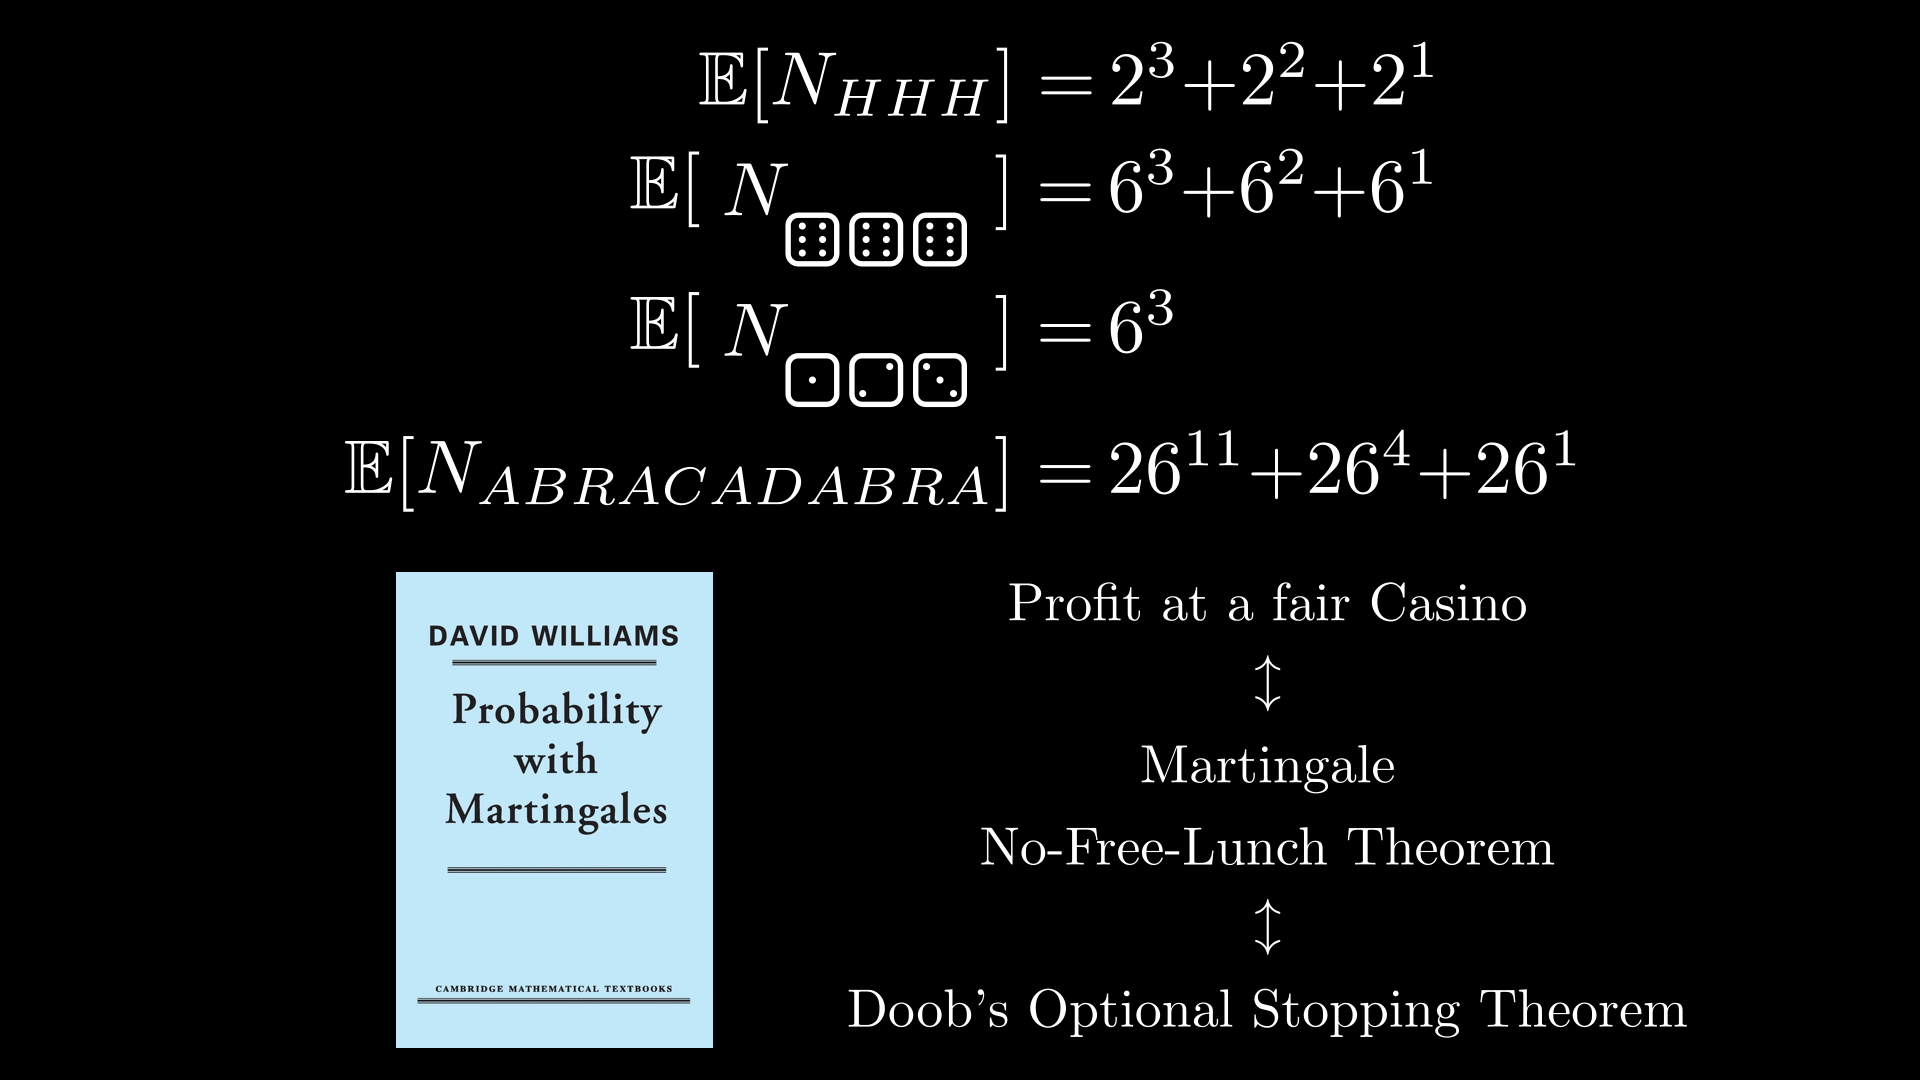

In [481]:
%%manim -v CRITICAL conclusion
class conclusion(Scene):
    def construct(self):
        
        myTemplate = TexTemplate()
        myTemplate.add_to_preamble(r"\usepackage{amsmath}") 
        
        
        ex1 = Tex("$\mathbb{E}[N_{HHH}$","$]=$","$\,2^3$","$+2^2$","$+2^1$").scale(1.5)
        #self.add(ex1)
        
        N = Tex("$N$")
        
        ex2 = VGroup(Tex("$\mathbb{E}[$"),N.copy(),Tex("$]=$","$\,6^3$","$+6^2$","$+6^1$")).scale(1.5).arrange(RIGHT)
        ex2[0].shift(1.8*LEFT)
        ex2[1].shift(1.8*LEFT)
        dice = VGroup(make_dice_face(6),make_dice_face(6),make_dice_face(6)).scale(0.4).arrange(RIGHT,buff=0.15)
        dice.next_to(ex2[1],0.5*(RIGHT+DOWN),buff=0)
        ex2 += dice
        
        #self.add(ex2)
        
        #return 0
        
        
        ex3 = VGroup(Tex("$\mathbb{E}[$"),N.copy(),Tex("$]=$","$\,6^3$")).scale(1.5).arrange(RIGHT)
        ex3[0].shift(1.8*LEFT)
        ex3[1].shift(1.8*LEFT)
        dice = VGroup(make_dice_face(1),make_dice_face(2),make_dice_face(3)).scale(0.4).arrange(RIGHT,buff=0.15)
        dice.next_to(ex3[1],0.5*(RIGHT+DOWN),buff=0)
        ex3 += dice
        
        
        ex4 = Tex("$\mathbb{E}[N_{ABRACADABRA}$","$]=$","$\,26^{11}$","$+26^4$","$+26^1$").scale(1.5)
        
        
        vg = VGroup(ex1,ex2,ex3,ex4).arrange(DOWN,aligned_edge=LEFT)
        vg.shift(1.2*UP)
        
        ex1.shift(3.5*RIGHT)
        ex2.shift(2.82*RIGHT)
        ex3.shift(2.82*RIGHT)
        
        vg.scale(0.75)
        vg.shift(0.75*UP)
        self.add(vg)
        
        
        book = ImageMobject("p_w_m.jpeg").scale(0.35)
        book.shift(2*DOWN+3*LEFT)
        self.add(book)
        
        lines = ["Profit at a fair Casino",r"$\updownarrow$","Martingale","No-Free-Lunch Theorem",r"$\updownarrow$","Doob's Optional Stopping Theorem"]
        
        
        text = VGroup(*[Tex(tex,tex_template=myTemplate) for tex in lines] ).scale(0.8).arrange(DOWN)
        
        text.next_to(book,4*RIGHT)
        self.add(text)
        
        #self.add(mob)

In [ ]:
#Dice rolls? ABRACADABRA theorem, Probability with Martingales Book. No-Free-Lunch theorem is the "Doob Optional stopping theorem" Gene sequences?

# Junk stuff here

In [ ]:
############################################

In [259]:
%%manim -v CRITICAL answer
class answer(Scene):
    def construct(self):
        pause_len = 1
        global H,T,empty_coin
        
        title_scale = 1.2
        
        answer = Tex("\emph{A}: Not all target sequences are the same!").scale(title_scale)
        answer.to_corner(UL)
        
        label = Tex("\emph{Q}: ")
        #E_HHTT = Tex(r"$\mathbb{E}[N_{HHTT}]$") 
        E_HHTT = VGroup(H.copy(),H.copy(),T.copy(),T.copy()).scale(0.5).arrange(RIGHT)
        
        
        comparison = Tex(" vs. ")
        #E_HTHT = Tex(r"$\mathbb{E}[N_{HTHT}]$")
        E_HTHT = VGroup(H.copy(),T.copy(),H.copy(),T.copy()).scale(0.5).arrange(RIGHT)
        
        
        ending = Tex("?")
        eqn = VGroup(label,E_HHTT,comparison,E_HTHT,ending).scale(title_scale).arrange(RIGHT)
        #eqn.next_to(defn,DOWN)
        eqn.to_corner(UL)
        eqn.set_x(0)
        label.next_to(eqn,LEFT)
        
        
        
        answer.set_x(0)
        self.play(Write(answer))
        self.pause(pause_len)
        
        
        
        #Setup defn and equation...which will be revealed later!
        defn = Tex(r"$\mathbb{E}[N_{\text{target}}]$ := \text{Average number of coinflips until target}")
        defn.next_to(answer,DOWN)
        defn.set_x(0)
        
        
        #eqn = VGroup(label,E_HHTT,comparison,E_HTHT,ending)
        
        #defn.align_to(answer,LEFT)
        
        
        
    
        
        cflips = [[H.copy(),H.copy()],[H.copy(),T.copy()],[T.copy(),H.copy()],[T.copy(),T.copy()]]
        E_cflips = [r"$\mathbb{E}[N_{HH}]=6$",r"$\mathbb{E}[N_{HT}]=4$",r"$\mathbb{E}[N_{TH}]=4$",r"$\mathbb{E}[N_{TT}]=6$"]
        final_colrs = [RED,GREEN,GREEN,RED]
        CC = cflips
        ECC = E_cflips
        TblEntry = cflips
        
        for i in range(4):
            CC[i] = VGroup(*cflips[i]).arrange(RIGHT).scale(0.8) #Tex(cflips[i],color=WHITE).scale(1.5)
            ECC[i] = Tex(E_cflips[i],color=BLACK).scale(0.8) # final_colrs[i])
            TblEntry[i] = VGroup(CC[i],ECC[i]).arrange(DOWN)
        
        tbl = MobjectTable([[TblEntry[0],TblEntry[1]],[TblEntry[2],TblEntry[3]]]).scale(1)  
        #tbl = MobjectTable([[TblEntry[0],TblEntry[1]],[TblEntry[2],TblEntry[3]]]).scale(1.2)  
        tbl.next_to(defn,DOWN)
        tbl.set_x(0)
        
        self.play(Write(tbl),run_time=1)
        self.wait(pause_len)
        
        def animate_and_show(which_ix):
            for ix in which_ix:
                CC[ix].generate_target()
                ECC[ix].generate_target()
                ECC[ix].target.set_color(final_colrs[ix])
                ECC[ix].target.scale(1.2)
                CC[ix].target.scale(1.2)
            self.play(*[MoveToTarget(CC[ix]) for ix in which_ix ])
            self.play(*[MoveToTarget(ECC[ix]) for ix in which_ix ])
            self.wait(pause_len)
        
        animate_and_show([0])
        self.play(Write(defn))
        animate_and_show([1])    
        animate_and_show([2,3])
        
        #Write the lenght 4 sequences!
        self.play(FadeOut(answer),Write(eqn))
        
        
        def set_target_location(A,B):
            A.target.set_x(B.get_x())
            A.target.set_y(B.get_y())
        
        label.target = Tex("\emph{A}:")
        set_target_location(label,label)
        comparison.target = Tex(r"$<$")
        set_target_location(comparison,comparison)
        ending.target = Tex(r"$!$")
        set_target_location(ending,ending)
        
        self.play(MoveToTarget(comparison),MoveToTarget(ending))
        
         
        
        
        
    
        
        
        

In [104]:
%%manim -v CRITICAL eqn_test
class eqn_test(Scene):
    def final_eqn_anim(self):
        eqn_scale = 1.2
        E = Tex(r"$\mathbb{E}[$").scale(eqn_scale)
    
        Profit = Tex(r"Casino Profit").scale(eqn_scale) 
        GainMinusLoss = Tex(r"Casino Gain" ,r"$-$", r"Casino Loss").scale(eqn_scale)
        
        Equals0 = Tex("$]=0$").scale(eqn_scale)
            
        eqn = VGroup(E,Profit,Equals0).arrange(RIGHT)
        self.play(Write(eqn))
    
        eqn2 = VGroup(E.copy(),GainMinusLoss,Equals0.copy()).arrange(RIGHT)
        
        E.target = eqn2[0]
        Profit.target = GainMinusLoss
        Equals0.target = eqn2[2]
        
        self.play(MoveToTarget(E),MoveToTarget(Profit),MoveToTarget(Equals0))
            
        Gain = GainMinusLoss[0]
        Minus = GainMinusLoss[1]
        Loss = GainMinusLoss[2]
        
        self.remove(Profit)
        self.add(Gain,Minus,Loss)
        
        Gain.generate_target()
        Gain.target = Tex(r"$N_{HT}$").scale(eqn_scale)
        Gain.target.set_x(Gain.get_x())
        Gain.target.set_y(Gain.get_y())
        self.play(MoveToTarget(Gain))
        
        Loss.generate_target()
        Loss.target = Tex(f"${final_ans}$").scale(eqn_scale)
        Loss.target.set_x(Loss.get_x())
        Loss.target.set_y(Loss.get_y())
        self.play(MoveToTarget(Loss))
        
        
        #eqn_A and eqn_AA are actually the same but parsed differently for the purposes of animations
        eqn_A = Tex(r"$\mathbb{E}[$", f"$N_{{}}$", "$-$", "$4$", "$]=0$").scale(eqn_scale) 
        eqn_AA = Tex(r"$\mathbb{E}[$", "$N_{HT}$", "$-$", "$4$", "$]$", "$\,=\,$", "$0$").scale(eqn_scale) 
        eqn_B = Tex(r"$\mathbb{E}[$", "$N_{HT}$", "$]$", "$-$", "$4$", "$\,=\,$", "$0$").scale(eqn_scale) 
        eqn_C = Tex(r"$\mathbb{E}[$", "$N_{HT}$", "$]$", "$\,=\,$", "$4$").scale(eqn_scale) 
        
        #E.generate_target()
        E.target = eqn_A[0]
        
        Gain.generate_target()
        Gain.target.set_x(eqn_A[1].get_x())
        
        Minus.generate_target()
        Minus.target.set_x(eqn_A[2].get_x())
        
        Loss.generate_target()
        Loss.target.set_x(eqn_A[3].get_x())
        
        Equals0.generate_target()
        Equals0.target.set_x(eqn_A[4].get_x())
        
        self.play(MoveToTarget(E),MoveToTarget(Gain),MoveToTarget(Minus),MoveToTarget(Loss),MoveToTarget(Equals0))
       
        
        #vgg = VGroup(E,Gain,Minus,Loss,Equals0)
        
        self.wait(2)
        
        
        self.remove(E,Gain,Minus,Loss,Equals0)
        self.play(TransformMatchingTex(eqn_AA, eqn_B))
        self.play(TransformMatchingTex(eqn_B, eqn_C,path_arc=-90 * DEGREES))
    
    def construct(self):
        self.final_eqn_anim()
        
        
        #self.play(TransformMatchingTex(pre_eqn, final_eqn,)
        
        
        #eqn.generate_target()
        #eqn.target = Tex(r"$\mathbb{E}[N_{HT} - 4]=0$").scale(1.2)
        #self.play(MoveToTarget(eqn))
        
        #eqn.generate_target()
        #eqn.target = Tex(r"\mathbb{E}[N_{HT}] - 4=0").scale(1.2)
        #self.play(MoveToTarget(eqn))
        
        
        #eqn.generate_target()
        #eqn.target = Tex(r"\mathbb{E}[N_{HT}] = 4").scale(1.2)
        #self.play(MoveToTarget(eqn))

In [54]:
%%manim -v CRITICAL eqn_test
class eqn_test(Scene):
    def construct(self):
       
        eqn = [MathTex(r"\mathbb{E}[", r"\text{Casino Profit}" "]", "=", "0"),
               MathTex(r"\mathbb{E}[", r"\text{Casino Gain}", "-", r"\text{Casino Loss}", "]", "=", "0"), 
               MathTex(r"\mathbb{E}[", "N_{HT}", "-", "4", "]", "=", "0"), 
               MathTex(r"\mathbb{E}[", "N_{HT}", "]", "=", "4")]    
        self.add(eqn[0])
        
        for i in range(3):
            self.play(TransformMatchingTex(eqn[i], eqn[i+1])) #,path_arc=-90 * DEGREES))
        
        # The animation TransformMatchingTex will line up parts
        # of the source and target which have matching tex strings.
        # Here, giving it a little path_arc makes each part sort of
        # rotate into their final positions, which feels appropriate
        # for the idea of rearranging an equation
        
        self.wait()

In [258]:
%%manim -v CRITICAL problem
class problem(Scene):
    def construct(self):
        pause_len = 1
        global H,T,empty_coin
        
        define = Tex("For target sequences of any length, define:")
        define.to_corner(UL)
        defns = MathTex(r"N_{\text{target}} &= \text{Number of coinflips until target} \\ \mathbb{E}[N_{\text{target}}] &= \text{Average number of coinflips until target}")
        defns.next_to(define,DOWN)
        defns.set_x(0)
        self.play(Write(define))
        self.play(Write(defns))
        
        #myTemplate = TexTemplate()
        #myTemplate.add_to_preamble(r"\usepackage{mathrsfs}") 
        
        #textB = Tex(r"b")
        #textC = Tex(r"a")
        #defn = VGroup(textA,textB,textC).arrange(DOWN,aligned_edge=LEFT)
        #defn.to_corner(UL)
        
        q = Tex("Which of these length  4 target sequences takes the longest?")
        q.next_to(defns,DOWN)
        q.align_to(define,LEFT)
        q.shift(DOWN)
        self.play(Write(q))
        
        text1 = Tex(r"$\mathbb{E}[N_{HHTT}]=?$")
        text2 = Tex(r"$\mathbb{E}[N_{HTHT}]=?$")
        text3 = Tex(r"$\mathbb{E}[N_{HTTH}]=?$")
        vg = VGroup(text1,text2,text3).arrange(DOWN)
        vg.next_to(q,DOWN)
        #self.play(Write(defn))
        self.play(Write(vg))
        
        

The same counterintiuitve phenonomena applies to longer target sequences. Using the same notation that N subscript a target sequence is the number of coinflips until the sequence is reached, we can ask the question how many flips on aveage do these length 4 sequences take on average? All three sequences have 2 tails and 2 heads, and it intuitively seems like they should all be the same, but actually they give three different values. Can you guess which ones takes the most number of flips and which one takes the fewest? By the end of the video we will have a quick and easy one line solution for these sequences!

 